In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_float64(fileIn):
    with open(fileIn, 'rb') as f:
        data = np.fromfile(f, dtype=np.dtype('>f8'))
        print(np.shape(data))
    return data

def read_float32(fileIn):
    with open(fileIn, 'rb') as f:
        data = np.fromfile(f, dtype=np.dtype('>f'))
        print(np.shape(data))
    return data

def write_float32(fout,fld):
    with open(fout, 'wb') as f:
        np.array(fld, dtype=">f").tofile(f)

In [3]:
def patchface3D(fldin,nx,nz):

    print(nz)
    #add a new dimension in case it's only 2d field:
    if nz == 1:
        fldin=fldin[np.newaxis, :, :]

    #defining a big face:
    a=np.zeros((nz,4*nx,4*nx))       #(50,270,360)

    #face1
    tmp=fldin[:,0:3*nx,0:nx]        #(50,270,90)
    a[:,0:3*nx,0:nx]=tmp

    #face2
    tmp=fldin[:,(3*nx):(6*nx),0:nx] #(50, 270,90)
    a[:,0:3*nx,nx:2*nx]=tmp

    #face3
    tmp=fldin[:,(6*nx):(7*nx),0:nx] #(50, 90, 90)
    tmp=np.transpose(tmp, (1,2,0))  #(90, 90, 50)
    ##syntax to rotate ccw:
    tmp1=list(zip(*tmp[::-1]))
    tmp1=np.asarray(tmp1)
    tmp1=np.transpose(tmp1,[2,0,1]) #(50, 90, 90)
    a[:,3*nx:4*nx,0:nx]=tmp1

    #face4
    tmp=np.reshape(fldin[:,7*nx:10*nx,0:nx],[nz,nx,3*nx]) #(50,90,270)
    tmp=np.transpose(tmp, (1,2,0))
    print(tmp.shape)                                      #(90,270,50)
    #syntax to rotate cw:
    tmp1=list(zip(*tmp))[::-1]      #type is <class 'list'>
    tmp1=np.asarray(tmp1)           #type <class 'numpy.ndarray'>, shape (270,90,50)
    tmp1=np.transpose(tmp1,[2,0,1]) #(50,270,90)
    a[:,0:3*nx,2*nx:3*nx]=tmp1

    #face5
    tmp=np.reshape(fldin[:,10*nx:13*nx,0:nx],[nz,nx,3*nx]) #(50,90,270)
    tmp=np.transpose(tmp, (1,2,0))                         #(90,270,50)
    tmp1=list(zip(*tmp))[::-1]      #type is <class 'zip'> --> <class 'list'>
    tmp1=np.asarray(tmp1)           #type <class 'numpy.ndarray'>, shape (270,90,50)
    tmp1=np.transpose(tmp1,[2,0,1]) #(50,270,90)
    a[:,0:3*nx,3*nx:4*nx]=tmp1

    return a


## Initial Conditions

In [4]:
dirrun = '/nobackup/dcarrol2/v05_latest/darwin3/run/'
pickup = read_float64(dirrun + 'pickup.0000841536.data')
pickup

niter = '0000841536'

# #dirrun = '/nobackup/dcarrol2/v05_latest/darwin3/run/'
# #pickup = read_float64(dirrun + 'pickup.0000841536.data')
# dirrun = '/nobackup/sreich/llc270_c68w_runs/run_spinup_300s/'
# pickup = read_float64(dirrun + 'pickup.' + niter + '.data')


(381923100,)


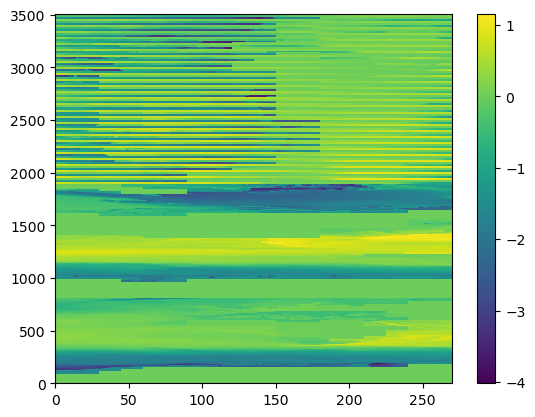

In [5]:
nx = 270
ny = 3510
nz = 50

#theta, salt, uvel, vvel 3d
#etan 2d

uvel = pickup[:nx*ny*nz]
#uvel = uvel.reshape((nz, ny, nx))

vvel = pickup[nx*ny*nz:2*nx*ny*nz]
#vvel = vvel.reshape((nz, ny, nx))

theta = pickup[2*nx*ny*nz:3*nx*ny*nz]
#theta = theta.reshape((nz, ny, nx))

salt = pickup[3*nx*ny*nz:4*nx*ny*nz]
#salt = salt.reshape((nz, ny, nx))

#g = pickup[4*nx*ny*nz:8*nx*ny*nz] # g's are 3d fields

etan = pickup[8*nx*ny*nz:8*nx*ny*nz + nx*ny]
#etan = etan.reshape((ny, nx))

plt.pcolormesh(etan.reshape((ny,nx)))
plt.colorbar()


1
(270, 810, 1)


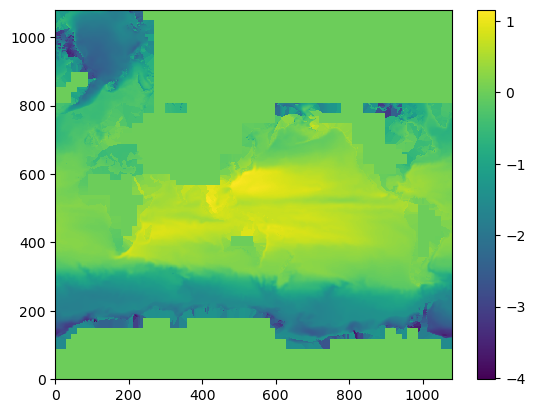

In [6]:
etan_world = patchface3D(etan.reshape((ny,nx)),270,1)

plt.pcolor(etan_world[0,:,:])
plt.colorbar()



## Seaice Data

In [11]:
si = read_float64(dirrun + 'pickup_seaice.0000841536.data')
si

(5686200,)


array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
# all are 2d fields

tice = si[:nx*ny]
area = si[nx*ny:2*nx*ny]
heff = si[2*nx*ny:3*nx*ny]
snow = si[3*nx*ny:4*nx*ny]
uice = si[4*nx*ny:5*nx*ny]
vice = si[5*nx*ny:6*nx*ny]

In [17]:
write_float32(dirtemp + 'SIarea.0000841536.data', area)
write_float32(dirtemp + 'SIsnow.0000841536.data', snow)
#write_float32(dirtemp + 'SIsalt.0000841536.data', salt)
write_float32(dirtemp + 'SIheff.0000841536.data', heff)
write_float32(dirtemp + 'SIuice.0000841536.data', uice)
write_float32(dirtemp + 'SIvice.0000841536.data', vice)